In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from joblib import Parallel, delayed
import joblib

In [2]:
df = pd.read_csv("../weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#Remove Rows where required columns are null
df1 = df[df['RainTomorrow'].notna() & df['Location'].notna()]

#Remove columns
df1 = df1.drop('Date', axis=1)

In [4]:
total = df['Date'].count()
print("Min Temp : "+str(df1['MinTemp'].isna().sum()*100/total))
print("Max Temp: "+str(df1['MaxTemp'].isna().sum()*100/total))
print("Rainfall : "+str(df1['Rainfall'].isna().sum()*100/total))
print("Evaporation: "+str(df1['Evaporation'].isna().sum()*100/total))
print("Sunshine : "+str(df1['Sunshine'].isna().sum()*100/total))
print("WindGustDir : "+str(df1['WindGustDir'].isna().sum()*100/total))
print("WindGustSpeed : "+str(df1['WindGustSpeed'].isna().sum()*100/total))
print("WindDir9am : "+str(df1['WindDir9am'].isna().sum()*100/total))
print("WindDir3pm  : "+str(df1['WindDir3pm'].isna().sum()*100/total))
print("WindSpeed9am : "+str(df1['WindSpeed9am'].isna().sum()*100/total))
print("WindSpeed3pm : "+str(df1['WindSpeed3pm'].isna().sum()*100/total))
print("Humidity9am : "+str(df1['Humidity9am'].isna().sum()*100/total))
print("Humidity3pm : "+str(df1['Humidity3pm'].isna().sum()*100/total))
print("Pressure9am  : "+str(df1['Pressure9am'].isna().sum()*100/total))
print("Pressure3pm : "+str(df1['Pressure3pm'].isna().sum()*100/total))
print("Cloud9am : "+str(df1['Cloud9am'].isna().sum()*100/total))
print("Cloud3pm : "+str(df1['Cloud3pm'].isna().sum()*100/total))
print("Temp9am : "+str(df1['Temp9am'].isna().sum()*100/total))
print("Temp3pm : "+str(df1['Temp3pm'].isna().sum()*100/total))
print("RainToday  : "+str(df1['RainToday'].isna().sum()*100/total))
print("RainTomorrow : "+str(df1['RainTomorrow'].isna().sum()*100/total))

Min Temp : 0.4379210779595765
Max Temp: 0.22136669874879691
Rainfall : 0.9665887529217654
Evaporation: 41.82799395022687
Sunshine : 46.62175168431184
WindGustDir : 6.414134469957377
WindGustSpeed : 6.372886016774371
WindDir9am : 6.8836793620239245
WindDir3pm  : 2.5972776020899215
WindSpeed9am : 0.9267152481781933
WindSpeed3pm : 1.8080571978550803
Humidity9am : 1.2195792657775333
Humidity3pm : 2.4817819331775057
Pressure9am  : 9.634263715110682
Pressure3pm : 9.61157706586003
Cloud9am : 36.88780420734223
Cloud3pm : 39.25065310050873
Temp9am : 0.6214766946239516
Temp3pm : 1.8740547229478894
RainToday  : 0.9665887529217654
RainTomorrow : 0.0


In [5]:
#Replace numerical missing data 
#Replace with mean values
mean_col = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
#Replace with mean of the column for null mean values of groups
df1[mean_col] = df1[mean_col].fillna(df1.groupby('Location')[mean_col].mean()[mean_col])
df1[mean_col] = df1[mean_col].fillna(df1.mean())

#Replace categorical values
#Replace with mode values 
mode_col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']
df1[mode_col] = df1[mode_col].fillna(df1.mode().iloc[0])
# arr = df1.groupby('Location')[['WindGustDir','WindDir9am','WindDir3pm','RainToday']].agg(pd.Series.mode).to_dict()

C:\Users\HP\AppData\Local\Temp\ipykernel_14044\3169079683.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1[mean_col] = df1[mean_col].fillna(df1.mean())


In [6]:
print("Min Temp : "+str(df1['MinTemp'].isna().sum()*100/total))
print("Max Temp: "+str(df1['MaxTemp'].isna().sum()*100/total))
print("Rainfall : "+str(df1['Rainfall'].isna().sum()*100/total))
print("Evaporation: "+str(df1['Evaporation'].isna().sum()*100/total))
print("Sunshine : "+str(df1['Sunshine'].isna().sum()*100/total))
print("WindGustDir : "+str(df1['WindGustDir'].isna().sum()*100/total))
print("WindGustSpeed : "+str(df1['WindGustSpeed'].isna().sum()*100/total))
print("WindDir9am : "+str(df1['WindDir9am'].isna().sum()*100/total))
print("WindDir3pm  : "+str(df1['WindDir3pm'].isna().sum()*100/total))
print("WindSpeed9am : "+str(df1['WindSpeed9am'].isna().sum()*100/total))
print("WindSpeed3pm : "+str(df1['WindSpeed3pm'].isna().sum()*100/total))
print("Humidity9am : "+str(df1['Humidity9am'].isna().sum()*100/total))
print("Humidity3pm : "+str(df1['Humidity3pm'].isna().sum()*100/total))
print("Pressure9am  : "+str(df1['Pressure9am'].isna().sum()*100/total))
print("Pressure3pm : "+str(df1['Pressure3pm'].isna().sum()*100/total))
print("Cloud9am : "+str(df1['Cloud9am'].isna().sum()*100/total))
print("Cloud3pm : "+str(df1['Cloud3pm'].isna().sum()*100/total))
print("Temp9am : "+str(df1['Temp9am'].isna().sum()*100/total))
print("Temp3pm : "+str(df1['Temp3pm'].isna().sum()*100/total))
print("RainToday  : "+str(df1['RainToday'].isna().sum()*100/total))
print("RainTomorrow : "+str(df1['RainTomorrow'].isna().sum()*100/total))

Min Temp : 0.0
Max Temp: 0.0
Rainfall : 0.0
Evaporation: 0.0
Sunshine : 0.0
WindGustDir : 0.0
WindGustSpeed : 0.0
WindDir9am : 0.0
WindDir3pm  : 0.0
WindSpeed9am : 0.0
WindSpeed3pm : 0.0
Humidity9am : 0.0
Humidity3pm : 0.0
Pressure9am  : 0.0
Pressure3pm : 0.0
Cloud9am : 0.0
Cloud3pm : 0.0
Temp9am : 0.0
Temp3pm : 0.0
RainToday  : 0.0
RainTomorrow : 0.0


In [7]:
#Convert label values into numerical values
le = LabelEncoder()
df1['Location'] = le.fit_transform(df1['Location'])
mapping_Location = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
df1['WindGustDir'] = le.fit_transform(df1['WindGustDir'])
mapping_WindDir = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
df1['WindDir9am'] = le.fit_transform(df1['WindDir9am'])
df1['WindDir3pm'] = le.fit_transform(df1['WindDir3pm'])
df1['RainToday'] = le.fit_transform(df1['RainToday'])
df1['RainTomorrow'] = le.fit_transform(df1['RainTomorrow'])
mapping_Rain = dict(zip(le.classes_, range(1, len(le.classes_)+1)))

<AxesSubplot:>

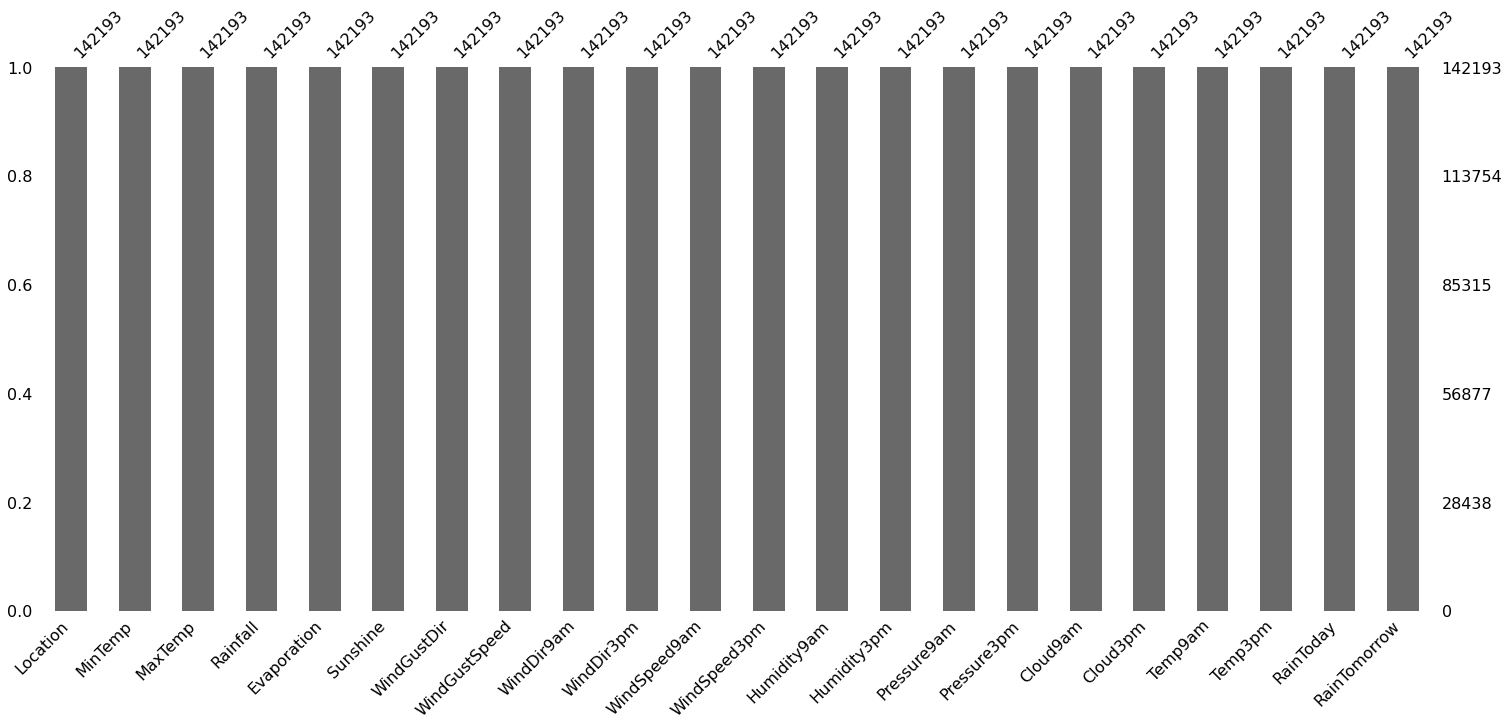

In [8]:
import missingno as msno
msno.bar(df1)

In [9]:
#Define x,y variables
x = df1.drop(['RainTomorrow'], axis=1)
y = df1['RainTomorrow']

In [10]:
#Divide the dataset for training and testing
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Logistic regression to the training set model 4
logreg = LogisticRegression(solver='liblinear', random_state=0)
result = logreg.fit(x_train, y_train)

#Predict the test set results model 4
y_pred_test = logreg.predict(x_test)
print('Model accuracy (Logistic Regression): {0:0.8f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training accuracy (Logistic Regression): {0:0.8f}'.format(logreg.score(x_train, y_train))) 

Model accuracy (Logistic Regression): 0.83965681
Training accuracy (Logistic Regression): 0.84099021


In [12]:
#Save the trained model
filename = "TomorrowRain_model.pkl"
joblib.dump(logreg, filename)

['TomorrowRain_model.pkl']

In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22052
           1       0.71      0.48      0.57      6387

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

